In [1]:
import pandas as pd

----------------------------------- เช็คข้อมูล ----------------------------------------------

ตรวจสอบ games.csv 

In [3]:
#ตรวจสอบข้อมูล games.csv
df_games = pd.read_csv('games.csv')
df_games
# print(df_games.dtypes) 

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


In [4]:
# เช็คว่ามีข้อมูลว่างใน DataFrame 
missing_data_count = df_games.isnull().sum()
print("จำนวนข้อมูลว่างในแต่ละคอลัมน์:")
print(missing_data_count)

จำนวนข้อมูลว่างในแต่ละคอลัมน์:
app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64


In [5]:
# เลือกเฉพาะคอลัมน์ "title" และลบแถวที่ซ้ำกัน
unique_titles = df_games['title'].str.strip().drop_duplicates()
print("รายชื่อเกมที่ไม่ซ้ำกัน:")
print(unique_titles)


รายชื่อเกมที่ไม่ซ้ำกัน:
0                Prince of Persia: Warrior Within™
1                          BRINK: Agents of Change
2                     Monaco: What's Yours Is Mine
3                               Escape Dead Island
4                          Dungeon of the ENDLESS™
                           ...                    
50867    I Expect You To Die 3: Cog in the Machine
50868                                     PAYDAY 3
50869                                   Eternights
50870                          Forgive Me Father 2
50871                                    FatalZone
Name: title, Length: 50751, dtype: object


ตรวจสอบ recommendations.csv 

In [6]:
#ตรวจสอบข้อมูล recommendations.csv
df_recommendations = pd.read_csv('recommendations.csv')
df_recommendations
# print(df_recommendations.dtypes) 

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4
...,...,...,...,...,...,...,...,...
41154789,633230,0,0,2021-02-15,True,41.0,1606890,41154789
41154790,758870,8,0,2019-07-18,False,8.0,1786254,41154790
41154791,696170,3,10,2018-03-26,False,2.0,6370324,41154791
41154792,696170,0,0,2018-06-11,True,4.0,1044289,41154792


In [16]:
# เช็คว่ามีข้อมูลว่างใน DataFrame 
missing_data_count = df_recommendations.isnull().sum()
print("จำนวนข้อมูลว่างในแต่ละคอลัมน์:")
print(missing_data_count)

จำนวนข้อมูลว่างในแต่ละคอลัมน์:
app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64


ตรวจสอบ users.csv 

In [7]:
df_users = pd.read_csv('users.csv')
df_users

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2
...,...,...,...
14306059,5047430,6,0
14306060,5048153,0,0
14306061,5059205,31,0
14306062,5074363,0,0


In [18]:
# ค้นหาค่า 311954495 ในคอลัมน์ user_id
result = df_users[df_users['user_id'] == 311954495]

# แสดงผลลัพธ์
print(result)

Empty DataFrame
Columns: [user_id, products, reviews]
Index: []


NameError: name 'plt' is not defined

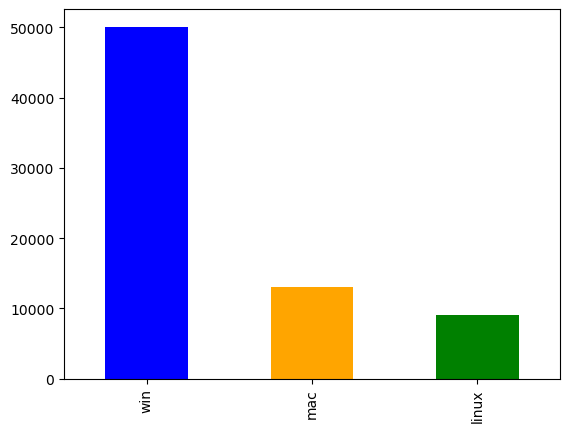

In [8]:
# อ่านข้อมูลจากไฟล์ CSV
df_games = pd.read_csv('games.csv')
df_recommendations = pd.read_csv('recommendations.csv')
df_users = pd.read_csv('users.csv')

# Data Visualization
# ตัวอย่างการนำเสนอจำนวนเกมที่มีในแต่ละระบบปฏิบัติการ
platform_counts = df_games[['win', 'mac', 'linux']].sum()
platform_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Number of Games on Each Operating System')
plt.xlabel('Operating System')
plt.ylabel('Number of Games')
plt.xticks(rotation=0)
plt.show()

# ตัวอย่างการนำเสนอราคาของเกม
plt.hist(df_games['price_final'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Game Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# ตัวอย่างการนำเสนอความสัมพันธ์ระหว่างราคาและคะแนน
plt.scatter(df_games['rating'], df_games['price_final'], color='red', alpha=0.5)
plt.title('Relationship between Rating and Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

# ตัวอย่างการนำเสนอการใช้เวลาเล่นเกมของผู้ใช้
plt.hist(df_recommendations['hours'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Playtime')
plt.xlabel('Hours Played')
plt.ylabel('Frequency')
plt.show()

# ตัวอย่างการนำเสนอจำนวนผู้ใช้ที่มีรายการสินค้าและรีวิว
plt.scatter(df_users['products'], df_users['reviews'], color='green', alpha=0.5)
plt.title('Number of Products vs. Number of Reviews')
plt.xlabel('Number of Products')
plt.ylabel('Number of Reviews')
plt.show()



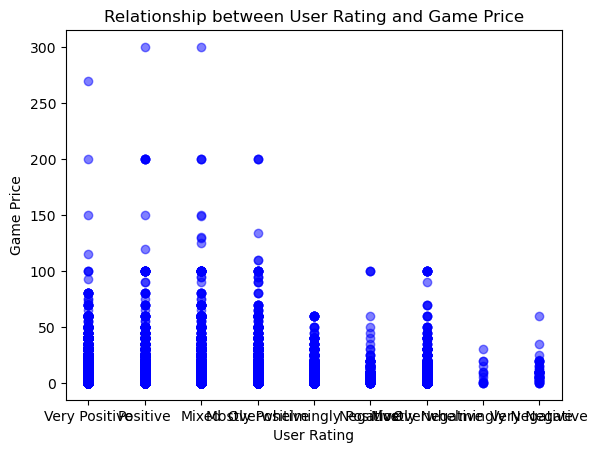

In [16]:
import pandas as pd

# อ่านข้อมูลจากไฟล์ CSV
df_games = pd.read_csv('games.csv')
df_recommendations = pd.read_csv('recommendations.csv')

# ทำ left join ระหว่าง games.csv และ recommendations.csv โดยใช้ app_id เป็น key
df_right_join = df_games.merge(df_recommendations, on='app_id', how='right')

# แสดงผลลัพธ์
df_right_join


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,Dwarf Fortress,2022-12-06,True,False,False,Overwhelmingly Positive,95,19665,30.00,0.00,0.0,True,0,0,2022-12-12,True,36.3,51580,0
1,304390,FOR HONOR™,2017-02-13,True,False,False,Mixed,69,82277,15.00,0.00,0.0,True,4,0,2017-02-17,False,11.5,2586,1
2,1085660,Destiny 2,2019-10-01,True,False,False,Very Positive,81,562723,0.00,0.00,0.0,True,2,0,2019-11-17,True,336.5,253880,2
3,703080,Planet Zoo,2019-11-05,True,False,False,Very Positive,90,60113,45.00,0.00,0.0,True,0,0,2022-09-23,True,27.4,259432,3
4,526870,Satisfactory,2020-06-08,True,False,False,Overwhelmingly Positive,97,119866,30.00,0.00,0.0,True,0,0,2021-01-10,True,7.9,23869,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41154789,633230,NARUTO TO BORUTO: SHINOBI STRIKER,2023-06-29,True,False,False,Very Positive,85,40328,20.00,0.00,0.0,True,0,0,2021-02-15,True,41.0,1606890,41154789
41154790,758870,Kynseed,2022-12-06,True,False,False,Very Positive,80,2125,24.99,24.99,0.0,True,8,0,2019-07-18,False,8.0,1786254,41154790
41154791,696170,SENRAN KAGURA Peach Beach Splash,2018-03-07,True,False,False,Very Positive,80,3312,29.99,29.99,0.0,True,3,10,2018-03-26,False,2.0,6370324,41154791
41154792,696170,SENRAN KAGURA Peach Beach Splash,2018-03-07,True,False,False,Very Positive,80,3312,29.99,29.99,0.0,True,0,0,2018-06-11,True,4.0,1044289,41154792


In [ ]:
# กรองข้อมูล funny ที่มีคะแนน 8-10
df_funny_high = df_left_join[(df_left_join['funny'] >= 8) & (df_left_join['funny'] <= 10)]

# แสดงผลลัพธ์
df_funny_high

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# อ่านข้อมูลจากไฟล์ CSV
df_left_join = pd.read_csv('df_left_join.csv')

# สร้าง Heatmap
plt.figure(figsize=(10, 8))
heatmap_data = df_left_join.pivot_table(index='rating', columns='price_final', values='app_id', aggfunc='count')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='g')
plt.title('Heatmap of Rating vs. Game Price')
plt.xlabel('Game Price')
plt.ylabel('Rating')
plt.show()


In [12]:
import pandas as pd

# อ่านข้อมูลจากไฟล์ games.csv และ recommendations.csv
games_df = pd.read_csv('games.csv')
recommendations_df = pd.read_csv('recommendations.csv')

# ทำการ join ข้อมูลจากทั้งสองไฟล์ด้วย app_id
merged_df = pd.merge(games_df, recommendations_df, on='app_id')

# หาผลิตภัณฑ์ที่มีรีวิวสูงที่สุด
most_reviewed_product = merged_df.groupby('app_id')['review_id'].count().idxmax()

print("ผลิตภัณฑ์ที่มีรีวิวสูงที่สุดคือ:", most_reviewed_product)


ผลิตภัณฑ์ที่มีรีวิวสูงที่สุดคือ: 440


In [17]:
# เลือกเฉพาะคอลัมน์ 'app_id' ที่ซ้ำกัน
duplicate_app_ids = df_right_join[df_right_join.duplicated('app_id')]['app_id']

# แสดงผลลัพธ์
print("App IDs ที่ซ้ำกัน:")
print(duplicate_app_ids)

App IDs ที่ซ้ำกัน:
15           306130
18           289070
21          1938090
26           304390
35           431960
             ...   
41154789     633230
41154790     758870
41154791     696170
41154792     696170
41154793    1089980
Name: app_id, Length: 41117184, dtype: int64
